In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

for i in range(50):
    # the 5% of younger individuals who experienced side-effects
    rand_y = randint(13,64)
    train_samples.append(rand_y)
    train_labels.append(1)
    
    # the 5% of older individuals who did not experienced any side-effects
    rand_z = randint(65,100)
    train_samples.append(rand_z)
    train_labels.append(0)
    
for j in range(1000):
    # the 95% population who did not experience any side-effects
    rand_y = randint(13,64)
    train_samples.append(rand_y)
    train_labels.append(0)
    
    # the 95% population who experienced side-effects
    rand_z = randint(65,100)
    train_samples.append(rand_z)
    train_labels.append(1)

In [3]:
# DATA PROCESSING
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPU's available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model = Sequential([
    Dense(units = 16, input_shape = (1,), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])


Num GPU's available:  1


In [4]:
# Preparing model for training using optimizers (ADAM = Learning rate  = 0.0001)
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# model ready for training
# Training set is shuffled only after the validation set is taken out from the training set
model.fit(x = scaled_train_samples, y = train_labels, validation_split = 0.1, batch_size = 10, epochs = 30, shuffle = True, verbose = 2)

Epoch 1/30
189/189 - 4s - loss: 0.7130 - accuracy: 0.4646 - val_loss: 0.6851 - val_accuracy: 0.5429 - 4s/epoch - 22ms/step
Epoch 2/30
189/189 - 1s - loss: 0.6652 - accuracy: 0.5598 - val_loss: 0.6482 - val_accuracy: 0.5714 - 752ms/epoch - 4ms/step
Epoch 3/30
189/189 - 2s - loss: 0.6311 - accuracy: 0.6127 - val_loss: 0.6212 - val_accuracy: 0.6095 - 2s/epoch - 10ms/step
Epoch 4/30
189/189 - 2s - loss: 0.6021 - accuracy: 0.6698 - val_loss: 0.5978 - val_accuracy: 0.6190 - 2s/epoch - 11ms/step
Epoch 5/30
189/189 - 1s - loss: 0.5748 - accuracy: 0.7169 - val_loss: 0.5753 - val_accuracy: 0.6619 - 764ms/epoch - 4ms/step
Epoch 6/30
189/189 - 1s - loss: 0.5473 - accuracy: 0.7513 - val_loss: 0.5518 - val_accuracy: 0.7048 - 806ms/epoch - 4ms/step
Epoch 7/30
189/189 - 1s - loss: 0.5177 - accuracy: 0.7831 - val_loss: 0.5277 - val_accuracy: 0.7429 - 841ms/epoch - 4ms/step
Epoch 8/30
189/189 - 1s - loss: 0.4887 - accuracy: 0.8206 - val_loss: 0.5044 - val_accuracy: 0.7857 - 862ms/epoch - 5ms/step
Epoch 

In [5]:
# Creating a test set that is used for predictionson our model
test_labels = []
test_samples = []


for i in range(10):
	# 5% of younger individuals who experienced side effects
	test_y = randint(13,64)
	test_samples.append(test_y)
	test_labels.append(1)

	# 5% of Older individuals who did not experienced side effects
	test_z = randint(65,100)
	test_samples.append(test_z)
	test_labels.append(0)

for j in range(200):
	# 95% of younger individuals who did not experienced side effects
	test_y = randint(13,64)
	test_samples.append(test_y)
	test_labels.append(0)

	# 95% of Older individuals experienced side effects
	test_y = randint(13,64)
	test_samples.append(test_y)
	test_labels.append(1)


In [6]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_samples, test_labels = shuffle(test_samples, test_labels)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

predictions = model.predict(x = scaled_test_samples, batch_size = 10, verbose = 0)

for i in predictions:
	print(i)

rounded_predictions = np.argmax(predictions, axis = -1)

for i in rounded_predictions:
	print(i)

[0.4304498  0.56955016]
[0.85862523 0.14137475]
[0.9504747  0.04952535]
[0.94580305 0.05419697]
[0.9216388  0.07836118]
[0.95074743 0.04925263]
[0.69665414 0.3033459 ]
[0.49946046 0.50053954]
[0.9504747  0.04952535]
[0.94717765 0.05282237]
[0.4647866 0.5352135]
[0.9512552  0.04874472]
[0.7251882  0.27481183]
[0.9516907 0.0483093]
[0.9130597  0.08694034]
[0.6665198 0.3334802]
[0.6021972  0.39780286]
[0.53413945 0.46586055]
[0.85862523 0.14137475]
[0.9514856  0.04851446]
[0.8409066  0.15909337]
[0.92807096 0.07192904]
[0.9507916  0.04920836]
[0.9503378  0.04966225]
[0.94091636 0.05908361]
[0.8214292  0.17857082]
[0.9497829  0.05021714]
[0.937214   0.06278597]
[0.63496053 0.36503944]
[0.8746646  0.12533541]
[0.95155704 0.04844302]
[0.9502265  0.04977349]
[0.4304498  0.56955016]
[0.9328635  0.06713646]
[0.9328635  0.06713646]
[0.95101863 0.04898134]
[0.95179415 0.04820586]
[0.9130597  0.08694034]
[0.77698857 0.22301146]
[0.75199366 0.2480063 ]
[0.951024   0.04897601]
[0.9499249  0.05007507

Confusion matrix, without normalization
[[186  24]
 [202   8]]


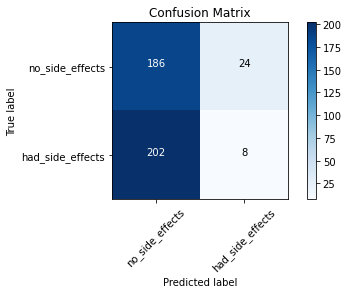

In [7]:
# Using the confusion matrix we can predict how well our model performs on test data
# Using of scikit-learn to create a confusion matrix

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true = test_labels, y_pred = rounded_predictions)

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float'/cm.sum(axis=1)[:, np.newaxis])
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['no_side_effects', 'had_side_effects']

plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'Confusion Matrix')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# MODEL.SAVE()


If we want to save a model at its current state after it was trained so that we could make use of it later, we can call the save() function on the model. To save(), we pass in the file path and name of the file we want to save the model to with an h5 extension.

In [9]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [10]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [11]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
new_model.optimizer

# model to .json

If you want to only save the architecture of the model and not the weights or its training configuration

In [13]:
json_string = model.to_json()

# same for yaml
# yaml_string = model.to_yaml()

In [14]:
json_string
# yaml_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [15]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# from tensorflow.keras.models import model_from_yaml
# model_architecture1 = model_from_yaml(yaml_string)

In [16]:
model_architecture

In [17]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# model.save_weigths()

If you only want to save the model

In [18]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weigths.h5')

In [19]:
model2 = Sequential([
    Dense(units = 16, input_shape = (1, ), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [20]:
model2.load_weights('models/my_model_weigths.h5')

In [21]:
model2.get_weights()

[array([[ 0.06332684,  0.3198317 , -0.33295187, -0.36841756,  0.50530076,
         -0.05072802,  0.7312237 , -0.56399363, -0.14272475,  0.6854016 ,
          0.4429353 , -0.11036682,  0.5960498 , -0.59165514,  0.5155217 ,
          0.25676462]], dtype=float32),
 array([ 0.29900512, -0.11287712,  0.        ,  0.        , -0.15678646,
         0.        , -0.12724568,  0.        ,  0.        , -0.11149776,
        -0.13153422,  0.        , -0.15324852,  0.        , -0.133107  ,
         0.081136  ], dtype=float32),
 array([[-7.72652030e-02,  4.61050451e-01, -2.62762249e-01,
         -2.20266849e-01, -3.63960326e-01,  3.13339621e-01,
          4.84363943e-01, -6.37616813e-02, -2.11785525e-01,
         -3.69386487e-02,  1.36327654e-01,  5.64567745e-03,
         -2.25940600e-01, -7.00317472e-02,  4.49592501e-01,
         -8.03120732e-02,  1.21847890e-01,  2.33470231e-01,
          2.72106141e-01,  4.24031645e-01, -5.80655560e-02,
          1.33006811e-01,  4.37128693e-01, -1.59940615e-01,
 